Experiments with CDF, iCDF and other stat stuff to apply it to QuantilleRegression code

In [12]:
import numpy as np

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

# Normal distribution

In [11]:
from scipy.stats import norm

In [61]:
x = np.arange(-10, 10, 0.1)

In [62]:
c = norm.cdf(x, loc=3, scale=1)

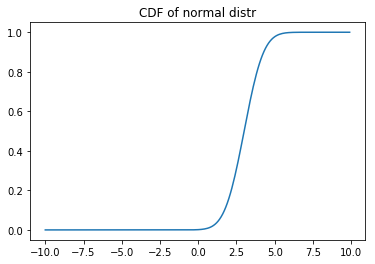

In [63]:
plt.plot(x, c)
plt.title("CDF of normal distr");

In [64]:
ic = norm.ppf(c)

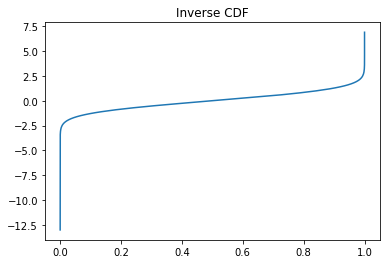

In [65]:
plt.plot(c, ic)
plt.title("Inverse CDF");

In [66]:
d = c[1:] - c[:-1]

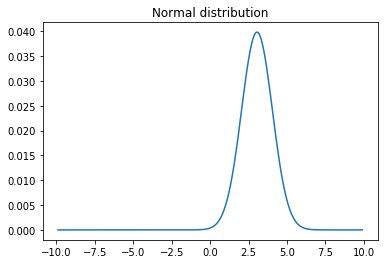

In [69]:
plt.plot(x[1:], d)
plt.title("Normal distribution");

# Mean calculation from inverse CDF

https://ckrao.wordpress.com/2012/07/18/the-mean-of-a-random-variable-in-terms-of-its-cdf/

According to Fubini's theorem, mean equals to the area below cdf for the negative x minus the area above cdf for the positive x.

In case of inverse CDF, it will be equal to the area above iCDF for negative X minus the area below iCDF for the positive X.

In [70]:
ic.min()

-13.000000000000002

In [75]:
def mean_from_icdf(probs, icdfs):
    res = 0.0
    prev_p = None
    for x, p in zip(icdfs, probs):
        if np.isinf(x):
            continue
        if prev_p is not None:
            res += x * (p - prev_p)
        prev_p = p
    return res

In [76]:
mean_from_icdf(probs=c, icdfs=x)

3.0499999999737488

If percentille step is fixed, expected value will be equal to mean(icdf)*delta_p